In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14240, done.
remote: Total 14240 (delta 0), reused 0 (delta 0), pack-reused 14240
Receiving objects: 100% (14240/14240), 12.78 MiB | 15.90 MiB/s, done.
Resolving deltas: 100% (9679/9679), done.


In [ ]:
!pwd

/content


In [ ]:
#copy data from gdrive to darknet folder
!cp -a /content/drive/'My Drive'/YoloTextDetection /content/darknet

In [ ]:
cd darknet

/content/darknet


In [ ]:
#Blog link: https://medium.com/@today.rafi/train-your-own-tiny-yolo-v3-on-google-colaboratory-with-the-custom-dataset-2e35db02bf8f 
!git clone https://github.com/rafiuddinkhan/Yolo-Training-GoogleColab.git

In [ ]:
!python /content/Yolo-Training-GoogleColab/anchors_calculation/anchors.py

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


In [ ]:
cd ..

/content


In [ ]:
cd darknet

/content/darknet


In [ ]:
!apt-get update
!apt-get upgrade

In [ ]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

In [ ]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [ ]:
!pwd

/content/darknet


In [ ]:
!apt-get -y install cmake
!which cmake

!cmake --version

In [ ]:
#Now let's get some YOLOv3 weights from the official site
#no need now
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

In [ ]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
!ls
%cd ../
!ls

In [ ]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


In [ ]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

In [ ]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
ls

darknet/  drive/  sample_data/


In [ ]:
%cd darknet
!make

In [ ]:
cd ..


/content


In [ ]:
!pwd

/content


In [ ]:
!ln -s /content/drive/My\ Drive/ mydrive

In [ ]:
cd content

/content


In [ ]:
cd darknet


/content/darknet


In [ ]:
!pwd

/content/darknet


In [ ]:
ls

3rdparty/   CMakeLists.txt          image_yolov3.sh*        README.md
backup/     darknet*                include/                results/
build/      DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build.ps1*  darknet.py              LICENSE                 src/
build.sh*   darknet_video.py        Makefile                video_v2.sh*
cfg/        data/                   net_cam_v3.sh*          video_yolov3.sh*
cmake/      image_yolov2.sh*        obj/                    YoloForDetection/


In [ ]:
cd /content/darknet

In [ ]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!ls

3rdparty   CMakeLists.txt	   image_yolov3.sh	  README.md
backup	   darknet		   include		  results
build	   DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1  darknet.py		   LICENSE		  src
build.sh   darknet_video.py	   Makefile		  video_v2.sh
cfg	   data			   net_cam_v3.sh	  video_yolov3.sh
cmake	   image_yolov2.sh	   obj			  YoloForDetection


In [ ]:
!pwd

/content/darknet


In [ ]:
!./darknet detector train YoloForDetection/obj.data /content/mydrive/YoloForDetection/yolo_v4_tiny.cfg /content/mydrive/YoloForDetection/yolov4-tiny.conv.29 -dont_show -mjpeg_port 8090 -map

In [ ]:
!./darknet detector test YoloForDetection/obj.data YoloForDetection/yolo_v4_tiny.cfg /content/drive/'My Drive'/yolo_v4_tiny_best.weights YoloForDetection/test/tel157.jpg -i 0 -thresh 0.4

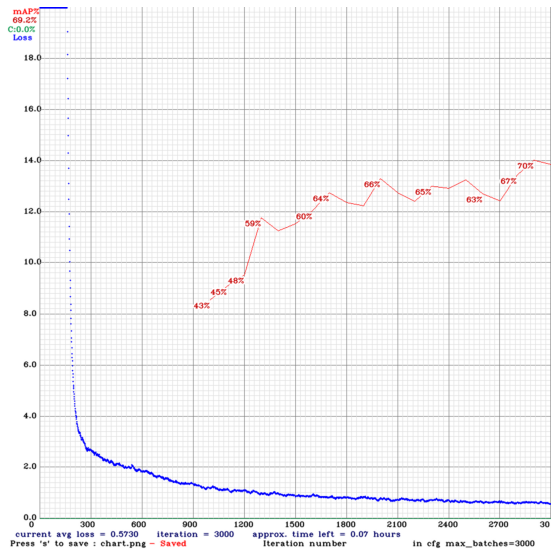

In [ ]:
imShow('chart.png')

In [ ]:
!./darknet detector test YoloForDetection/obj.data YoloForDetection/yolo_v4_tiny.cfg /content/drive/'My Drive'/yolo_v4_tiny_best.weights YoloForDetection/test/mal155.jpg -i 0 -thresh 0.5

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test YoloForDetection/obj.data YoloForDetection/yolo_v4_tiny.cfg /content/drive/'My Drive'/yolo_v4_tiny_best.weights YoloForDetection/test/tel168.jpg -i 0 -thresh 0.5

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 

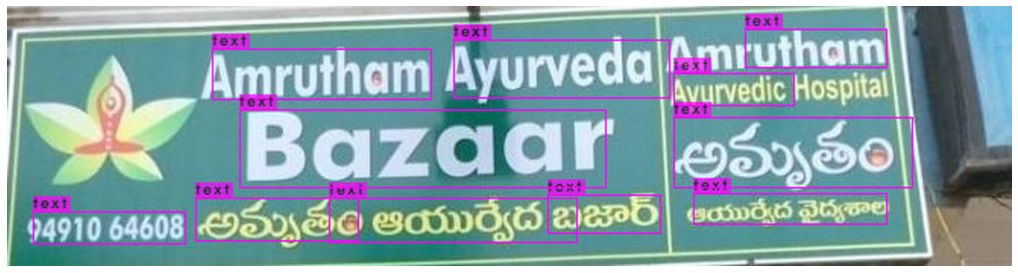

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test YoloForDetection/obj.data YoloForDetection/yolo_v4_tiny.cfg /content/drive/'My Drive'/yolo_v4_tiny_best.weights YoloForDetection/test/tel173.jpg -i 0 -thresh 0.5

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 

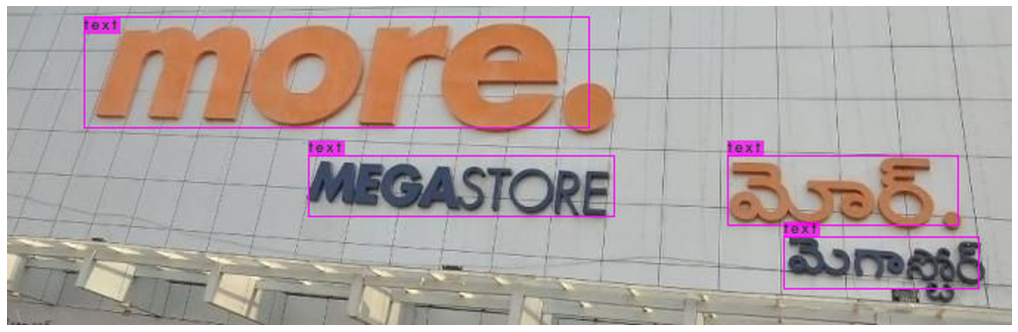

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test YoloForDetection/obj.data YoloForDetection/yolo_v4_tiny.cfg /content/drive/'My Drive'/yolo_v4_tiny_best.weights YoloForDetection/test/dev159.jpg -i 0 -thresh 0.5

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 

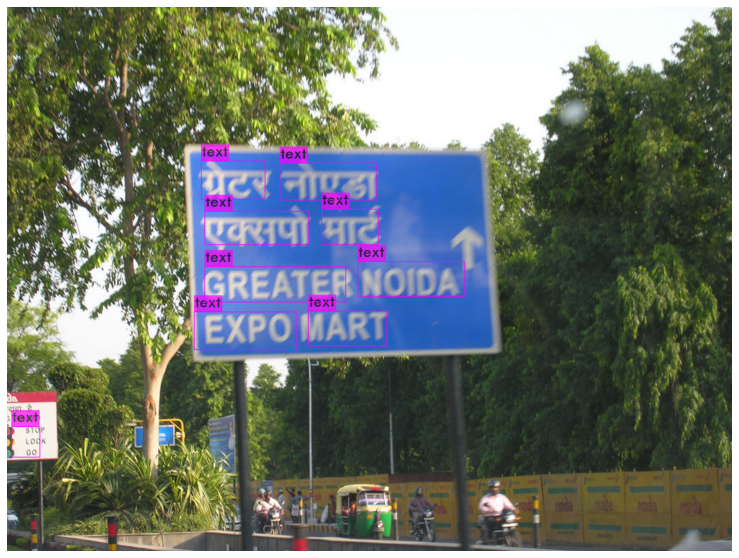

In [ ]:
imShow('predictions.jpg')